# THE WHAT?

NB: Make sure to update taxonomy at the end!

In [1]:
file = '../../data/papersummaries_cleaned.csv'

In [2]:
import pandas as pd
import re

In [3]:
df = pd.read_csv(file)

NB: Because 'validate' is also used for the meta studies (validation of some procedure), we will need to remove 'bad tags' later

In [4]:
def helper(regex):
    res = [x for x in df.PaperSummary if re.search(regex, x)]
    return (len(res), res)

def give(loc):
    return df.PaperSummary[loc]

def match(loc):
    summary = give(loc)
    return (summary, assign_all_what(summary))

### The Rules

In [5]:
def assign_tag(level_1, level_2, level_3, summary):
    tags = []
    for tag in level_2:
        if any([re.search(keyword, summary) for keyword in level_3[tag]]):
            tags.append(level_1+tag)
    return tags

In [110]:
def assign_phase(summary):
    level_1 = ':phase'
    
    level_2 = [':elicitation', ':analysis', ':specification', ':evaluation', ':management']
    
    level_3 = {':elicitation': ['[Ee]licit', '[Dd]iscover', 'brainstorm', 'identify\snew\sreq'], 
               ':analysis':    ['[Aa]naly[sz]ing\srequirements', 'requirements\sanalysis', 'requirements\scategoriz',
                                'negotia', 'conflicting\sreq', '\srelations\s', 'interaction between requirements'], 
               ':specification': ['[Rr]equirements?\sspec', 'specify'],
               ':evaluation':  ['[Vv]erif', '[Vv]alidat', '[Tt]esting.*?(?!hypothes)', 
                                'test\sstatus', 'requirements?\sreview', 'review.*?requirements'],
               ':management':  ['[Mm]aint[ae]', '\s[Aa]dapt', '[ -][Rr]eus[ei]', 'continuous', 
                                '\schange', '[Rr]ecover', '\s[Ee]volution|\sevolv[ei]', 
                                '[Mm]onitor', '[Rr]untime', 'requirements?\smanage',
                                
                               ]
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

#### Information to be Documented

*Question: In the literature, we find the distinction functional requirements, quality requirements, constraints. So far, we only have a separate category for quality requirements.
Do we want to use the other categories, too? If so, how would we group the remaining 'information' items under the headings?*

In [7]:
def assign_quality(summary):
    level_1 = ':information:quality'
    
    level_2 = ['_compatibility', '_maintainability', '_performance', '_portability', 
               '_reliability', '_safety', '_security', '_usability', '_sustainability',
               '_all']
    
    level_3 = {'_compatibility':   ['[Cc]ompatib'], 
               '_maintainability': [], 
               '_performance':     ['[Pp]erformance', 'response\stime'],
               '_portability': ['[Pp]ortab'],
               '_reliability': ['reliab', 'dependab'],
               '_safety':      ['[Ss]afety\s'],
               '_security':    ['[Ss]ecur', '[Pp]rivac'],
               '_usability':   ['[Uu]sability'],
               '_sustainability': ['[Ss]ustainability'],
               '_all': ['[Qq]uality\s[Rr]eq', 'non-functional']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [8]:
def assign_information(summary):
    level_1 = ':information'
    
    level_2 = [':architecture', ':goals', ':systembehavior', 
               ':functional', ':scenarios', ':rules']
    
    level_3 = {':architecture': ['architect(?:ural|ing)'],
               ':goals': ['stakeholder\sgoals', 'goal-orient'], 
               ':systembehavior': ['behaviou?ral\sreq'],
               ':functional': ['\sfunctional\sreq', 'product.{1,10}req', 'functionality'],
               ':scenarios': ['scenario'],
               ':rules': ['\srule']
               }
    
    return assign_tag(level_1, level_2, level_3, summary) + assign_quality(summary)

#### Requirements Documentation Types

*Question: Should we further distinguish between Natural Language, Conceptual Model, and Hybrid Techniques (plus the general 'artifact' category)?*

In [9]:
def assign_documentation(summary):
    level_1 = ':documentation'
    
    level_2 = [':artifacts', 
               ':diagrams', ':businessmodels', ':goalmodels', ':featuremodels',
               ':statemachines', ':prototypes', ':usecases', 
               ':naturallanguage', ':userstories']
    
    level_3 = {':artifacts':      ['[Aa]rtifact'],
               ':diagrams':       ['[Dd]iagram', 'UML'], 
               ':businessmodels': ['business\s(process\s)?models?'], 
               ':goalmodels':     ['goal\smodel', 'i\*'],
               ':featuremodels':  ['feature(?:\-oriented)?\smodel', 'model.*?product',
                                   'Requirements Composition Tables'],
               ':statemachines':  ['state\smachine'],
               ':naturallanguage':['natural\slanguage', '[- ]words?', '[- ]text'],
               ':prototypes':     ['[Pp]rototyp'],
               ':usecases':       ['use[- ]case'],
               ':userstories':    ['user[- ]stories'],
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [138]:
def assign_challenge_content(summary):
    level_1 = ':challenge:content'
    
    level_2 = ['_unambiguousness', '_consistency', 
               '_feasibility', '_traceability', 
               '_completeness', '_understandability',
               '_all'
              ]
    
    level_3 = {'_unambiguousness': ['ambigu', 'clarif', 'vague'],
               '_consistency':     ['inconsisten'],
               '_feasibility':     ['realizab', 'feasib'],
               '_traceability':    ['\strac[ei]', 'linking', 'requirements?\sdependency'],
               '_completeness':    ['completeness', 'incomplete', 
                                    'insufficient', 'missing\srequire', 'scope\screep'],
               '_understandability': ['understandability', 'comprehens(?:ion|ibility)', 
                                      '\sreadab','complicat', 
                                      '(?<!for)(?<!on)(?<!domain)\sunderstanding'],
               '_all': ['requirements?\sdefect', 'requirements?\serror', 'inadeq']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [11]:
def assign_challenge_people(summary):
    level_1 = ':challenge:people'
    
    level_2 = ['_communication', '_collaboration', '_subjectivity', '_skills'
              ]
    
    level_3 = {'_communication': ['[Cc]ommunica', 'misunderst', 'feedback', 
                                  'exchanging\sreq'],
               '_collaboration': ['[Cc]ollabor'],
               '_subjectivity':  ['[Pp]erce(?:pti|iv)', '[Bb]elie[fv]', 'subjectiv'],
               '_skills':        ['educat', '(?<!machine\s)learning', 'skills', '\sread\s',
                                  'teaching', 'creativ', '\sjobs?\s', 'training']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [168]:
def assign_challenge_process(summary):
    level_1 = ':challenge:process'
    
    level_2 = ['_automation', '_formalization', '_standardization',
               '_prioritization', '_visualization', '_deciding', '_improving'
              ]
    
    level_3 = {'_automation':      ['[Aa]utomat(?:ic|ion|ing|es|e)'],
               '_formalization':   ['[Ff]ormaliz', 'informal'],
               '_prioritization':  ['[Pp]riorit', 'preferred'],
               '_standardization': ['[Ss]tandardiz', '[Tt]emplate', '[Rr]eus[ea]', '[Bb]lueprint'],
               '_visualization':   ['[Vv]isual'],
               '_deciding':        ['[Dd]ecision[- ]making', '[Dd]ecide(?!d)', '[Dd]ecisions?\sprobl',
                                    'RE\sdecision'],
               '_improving':       ['improv'] 
               # improving included to see if mention of word stem makes a difference
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [206]:
def assign_challenge_context(summary):
    level_1 = ':challenge:context'
    
    level_2 = ['_uncertainty', '_regulation']
    
    level_3 = {'_uncertainty':   ['uncertain', '\srisk'],
               '_regulation':    ['regulat[io]', 'jurisdict', 'legal', 
                                  'compliance\s(?!with)','\sethic']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [203]:
def assign_all_challenges(summary):
    level_1 = ':challenge'
    level_2 = [':failure', ':problem']
    level_3 = {':failure': ['failure', 'failed', 'unsatisf'],
               ':problem': ['problem']
               # problem included to see if mention of word stem makes a difference
              }    
    return (assign_tag(level_1, level_2, level_3, summary)
            + assign_challenge_content(summary) 
            + assign_challenge_people(summary) 
            + assign_challenge_process(summary) 
            + assign_challenge_context(summary))

In [204]:
def assign_domain_class(summary):
    level_1 = ':domain:systemclass'
    
    level_2 = ['_embedded', '_safetycritical', '_adaptive', '_complex', '_bi']
    
    level_3 = {'_embedded': ['[Ee]mbedded\s[Ss]ystem'],
               '_bi': ['enterprise\ssystem'], # business intelligence
               '_safetycritical': ['safety[ -]critical'],
               '_adaptive': ['[Aa]daptive\s[Ss]ystem'],
               '_complex': ['[Cc]omplex.*?[Ss]ystem'],
               '_opensource': ['[Oo]pen\s[Ss]ource'],
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [ ]:
def assign_domain_sector(summary):
    level_1 = ':domain:sector'
    
    level_2 = ['_automotive', '_subsea', '_mobile', '_media', '_it', '_health', '_public',
               '_energy', '_nanotechnology', '_supplier']
    
    level_3 = {'_automotive': ['[Aa]utomotive'],
               '_subsea': ['[Ss]ubsea'],
               '_mobile': ['[Mm]obile'],
               '_media':  ['entertainment', '\sgames?'],
               '_it':     ['\s[Ww]eb\s', 'IT\scompany'],
               '_health': ['health', 'medicine', '\sinjur(?:y|ies)'],
               '_public': ['[Pp]olice', 'public\s(?:sector|admin)', 'governa?ment'],
               '_energy': ['energy'],
               '_nanotechnology': ['nano\s?\-?technology'],
               '_supplier': ['suppl']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [158]:
def assign_domain_organization(summary):
    level_1 = ':domain:organization'
    
    level_2 = ['_distributed', '_agile', '_outsourced', '_lean']
    
    level_3 = {'_distributed': ['\sdistributed\s', 'distance'],
               '_agile':       ['\sagile\s'],
               '_lean':        ['\slean\s'],
               '_outsourced':  ['outsourced\sproj']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [159]:
def assign_all_domains(summary):
    return (assign_domain_class(summary) 
            + assign_domain_sector(summary) 
            + assign_domain_organization(summary))

In [160]:
def assign_region(summary):
    level_1 = ':region'
    
    level_2 = [':continent_europe', ':continent_asia', ':continent_namerica', 
               ':continent_samerica', ':continent_africa', ':continent_australia',
               ':country_finland', ':country_china'
              ]
    
    level_3 = {x:[] for x in level_2}
    
    level_3[':country_finland'] = ['Finland']
    level_3[':country_china'] = ['China']
    
    return assign_tag(level_1, level_2, level_3, summary)

In [161]:
def assign_general(summary):
    level_1 = ':general'
    
    level_2 = [':research', ':terminology', ':framework']
    
    level_3 = {':research': ['literature.*?research', 'threats\sto\svalidity', 
                             'research\sproject'],
               ':terminology': [],
               ':framework': ['conceptual framework', 'persona-centric.*?framework'],
               }
    
    return assign_tag(level_1, level_2, level_3, summary)
    

In [207]:
def assign_all_what(summary):
    tags = ['what'+ x for x in 
            (
                assign_phase(summary)
                + assign_information(summary)
                + assign_documentation(summary)
                + assign_all_challenges(summary)
                + assign_domain_class(summary)
                + assign_domain_sector(summary)
                + assign_domain_organization(summary)
                + assign_region(summary)
                + assign_general(summary)
            )]
    return tags

In [186]:
helper('critical')

(10,
 ['A process for creating traceability links between safety requirements, safety taxonomies, and safety risks in order to assure and recertify legacy safety-critical systems',
  'An experience report on modeling a safety critical domain using a formal method in order to better understand its adequacy for domain engineering',
  "A method for structuring a system so that critical requirements are localized in reliable subsets of its components in order to guarantee system's dependability largely by construction",
  'A set of reusable queries for implementing a blueprint for traceability in safety-critical systems in order to comply with full life-cycle traceability as required by certification and regulatory agencies',
  'A study based on review inspections and interviews with practitioners on the most critical and important quality criteria for natural language requirements specifications',
  'A model for capturing and representing traceability in order to provide safety evidence o

In [19]:
#[assign_all_what(x) for x in df.PaperSummary]

In [208]:
df['what'] = [assign_all_what(x) for x in df.PaperSummary]

In [209]:
df.head()

,PaperID,PaperSummary,what
0,1,A method for automatically recovering software...,"[what:phase:management, what:documentation:art..."
1,2,A set of two techniques for improving the qual...,"[what:information:functional, what:challenge:c..."
2,3,A case study on evaluating a given technique f...,[what:challenge:process_prioritization]
3,4,An experience report on the development of a m...,"[what:phase:evaluation, what:challenge:process..."
4,5,A document-driven study on the relevancy of cl...,[what:phase:specification]


Summaries without tags?

In [210]:
len([(x[0], x[1][1], x[1][2]) for x in df.iterrows() if len(x[1][2]) < 1])

4

In [175]:
[(x[0], x[1][1], x[1][2]) for x in df.iterrows() if len(x[1][2]) < 1]

[(119,
  'A literature study on understanding the strengths and weaknesses of service description methods in order to allow developers selecting an appropriate description method that fits best their services',
  []),
 (330,
  'A case study for evaluating a particular approach to release planning in order to reach the market as early as possible with a competitive level of quality.',
  []),
 (335,
  'A method for modeling and reasoning about information quality at requirements level in order to avoid low-quality information for critical systems.',
  []),
 (350,
  'A data-driven study for comparing several probabilistic techniques to classify app reviews from app stores in order to assess their accuracy.',
  [])]

In [211]:
longform_tags = pd.DataFrame(columns=['PaperID', 'Tag'])
for row in df.iterrows():
    longform_tags = longform_tags.append(
        pd.DataFrame({'PaperID':list(len(row[1][2])*[row[1][0]]), 'Tag':row[1][2]}))
    #longform_tags = longform_tags.append(
        #pd.DataFrame({'PaperID':list(len(row[1][3])*[row[1][0]]), 'Tag':row[1][3]}))
longform_tags = longform_tags.reset_index().drop('index', axis=1)
longform_tags.head()

,PaperID,Tag
0,1,what:phase:management
1,1,what:documentation:artifacts
2,1,what:challenge:content_traceability
3,1,what:challenge:process_automation
4,2,what:information:functional


In [212]:
longform_tags.shape

(844, 2)

In [213]:
tags_four_levels = list(zip(*[x.split(':') for x in longform_tags.Tag]))
longform_tags['level_1'] = tags_four_levels[0]
longform_tags['level_2'] = tags_four_levels[1]
longform_tags['level_3'] = [x.split('_')[0] for x in tags_four_levels[2]]
longform_tags['level_4'] = [x.split('_')[-1] if (len(x.split('_')) > 1) 
                                                    else '' for x in tags_four_levels[2]]
longform_tags.head()

,PaperID,Tag,level_1,level_2,level_3,level_4
0,1,what:phase:management,what,phase,management,
1,1,what:documentation:artifacts,what,documentation,artifacts,
2,1,what:challenge:content_traceability,what,challenge,content,traceability
3,1,what:challenge:process_automation,what,challenge,process,automation
4,2,what:information:functional,what,information,functional,


In [217]:
#longform_tags.to_csv('../../analysis/papersummaries_tagged_what.csv', index=False)

<IPython.core.display.Javascript object>


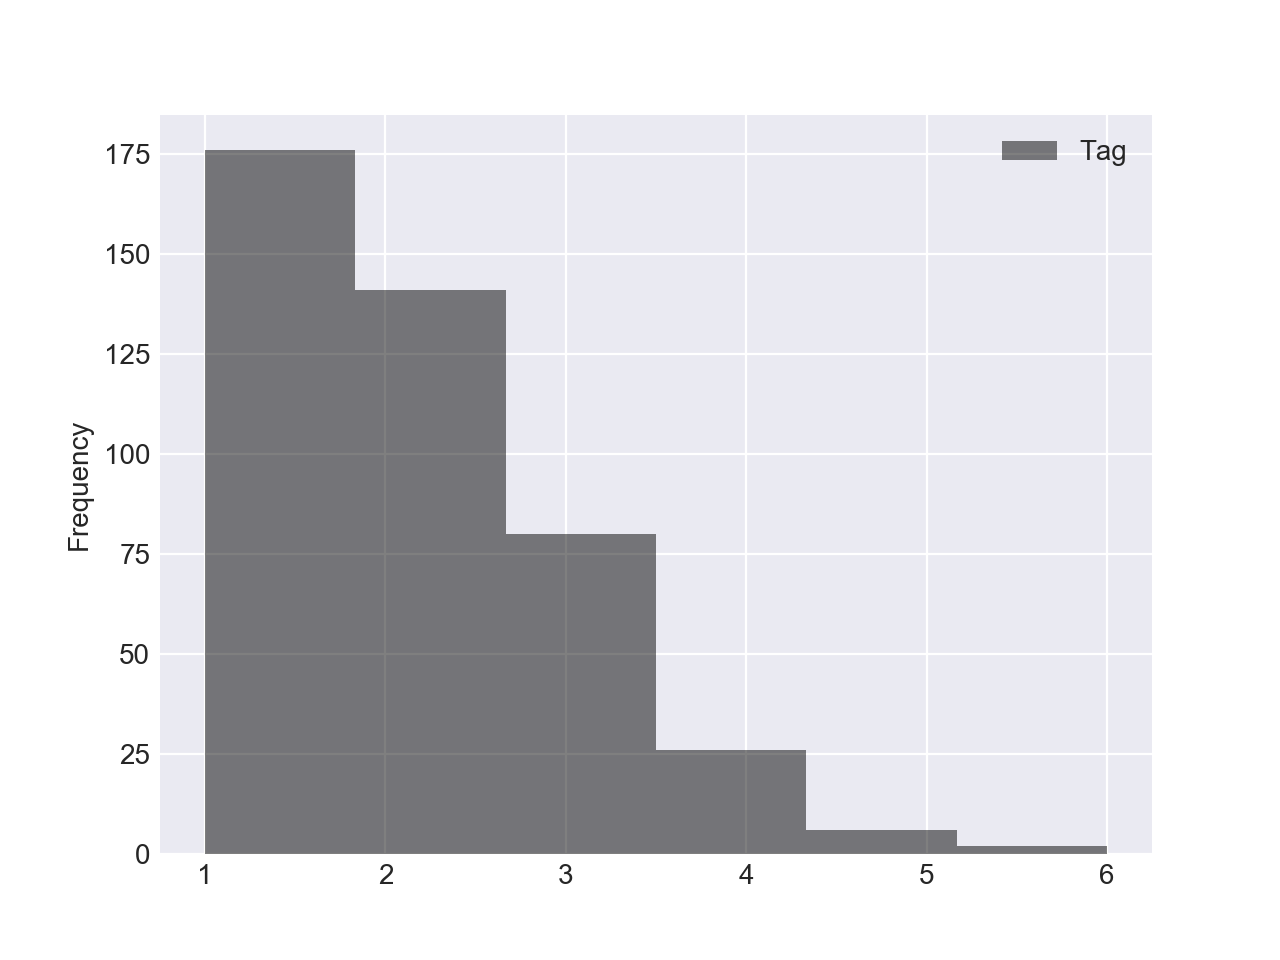

In [219]:
longform_tags.groupby('PaperID').count(
)[['Tag']].sort_values('Tag', ascending=False).plot.hist(bins=6, color='k', alpha=0.5)

In [214]:
longform_tags.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
].sort_values('PaperID', ascending=False)

PaperID
level_1 level_2       level_3         level_4                   
what    phase         management                              70
        challenge     process         automation              47
        phase         elicitation                             45
        challenge     content         traceability            43
        documentation naturallanguage                         42
        challenge     process         improving               36
        phase         evaluation                              35
        challenge     context         uncertainty             28
        phase         specification                           27
        information   quality         security                26
        challenge     context         regulation              23
                      people          communication           20
                      content         unambiguousness         18
        information   quality         all                     17
        challenge     process         standardization         17
                      people          skills                  16
                      process         prioritization          16
        phase         analysis                                15
        challenge     content         understandability       15
                      problem                                 14
        documentation artifacts                               14
        challenge     content         completeness            13
                      process         visualization           12
        information   functional                              12
        challenge     process         deciding                11
        documentation usecases                                11
        domain        organization    agile                   11
        documentation featuremodels                           11
        challenge     people          subjectivity             9
                                      collaboration            9
...                                                          ...
        domain        systemclass     safetycritical           5
        information   rules                                    4
        domain        sector          automotive               4
                                      health                   4
                                      it                       4
        documentation userstories                              4
        challenge     content         feasibility              4
        domain        sector          public                   4
        challenge     process         formalization            4
        domain        sector          mobile                   4
                      organization    distributed              3
        information   quality         sustainability           3
        domain        sector          supplier                 3
        information   systembehavior                           3
        domain        sector          energy                   2
        information   quality         reliability              2
        domain        organization    lean                     2
        general       framework                                2
        information   quality         usability                2
        domain        systemclass     embedded                 2
        documentation prototypes                               1
                      businessmodels                           1
        region        country         china                    1
        domain        organization    outsourced               1
        documentation statemachines                            1
        domain        systemclass     bi                       1
                      sector          nanotechnology           1
                                      subsea                   1
                      systemclass     complex                  1
        region        count

In [58]:
%matplotlib notebook
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style('darkgrid')

<IPython.core.display.Javascript object>


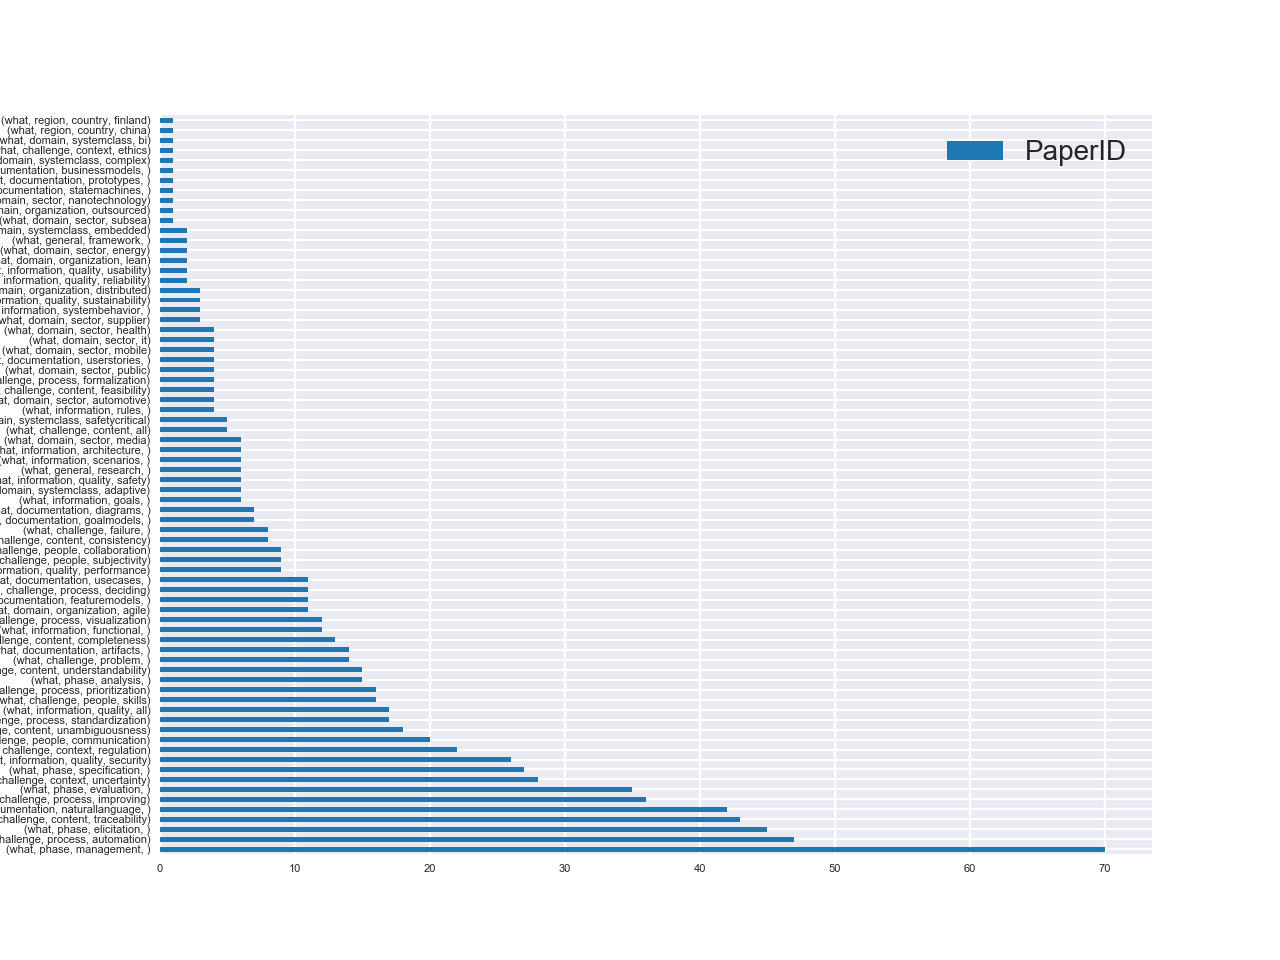

In [183]:
longform_tags.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
].sort_values('PaperID', ascending=False).plot.barh(stacked=True, fontsize=4)

In [215]:
longform_tags.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
].to_csv('../../analysis/paper_tagging_what_preliminary.csv', index=True)

In [216]:
longform_tags.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
].sort_values('PaperID', ascending=False
             ).to_csv('../../analysis/paper_tagging_what_preliminary_sorted.csv', index=True)

The End.